# Fade to Punk
Using numpy to create animations.

In [2]:
import sys
sys.path.append('..')
sys.path.append('/home/tnn1t1s/art/cpunks-10k')

import numpy as np
import pandas as pd
import pickle
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib inline
plt.style.use('default')
from matplotlib.colors import rgb2hex
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

import cpunks.cpunks10k as cpunks10k
import cpunks.cutils as cpu

In [3]:
cp = cpunks10k.cpunks10k()
(X_train, Y_train), (X_test, Y_test), (labels) = cp.load_data()
X = np.concatenate((X_train, X_test), axis=0)
df = cp.punks_df

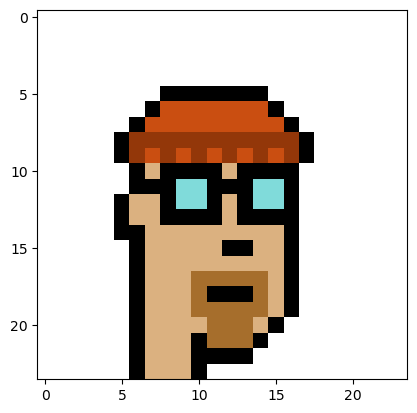

In [4]:
plt.imshow(X[4534])

In [5]:
img = X[4534]
img_flat = cpu.flatten(img).reshape((24*24))
mask = np.zeros((24*24), dtype=np.uint8)

### do skin_color, then black, then whatever is left

In [7]:
black = '[0. 0. 0. 1.]'
skin_color = '[0.85882354 0.69411767 0.5019608  1.        ]'
np.unique(img_flat)

array(['[0. 0. 0. 0.]', '[0. 0. 0. 1.]',
       '[0.5019608  0.85882354 0.85490197 1.        ]',
       '[0.5764706  0.21568628 0.03529412 1.        ]',
       '[0.6509804  0.43137255 0.17254902 1.        ]',
       '[0.7921569  0.30588236 0.06666667 1.        ]',
       '[0.85882354 0.69411767 0.5019608  1.        ]'], dtype='<U45')

In [8]:
def get_frame(x, mask):
    frame = np.array([x[i] if mask[i] else '[0. 0. 0. 0.]' for i in range(0,(24*24))]).reshape(24,24)
    return cpu.unflatten(frame)

def frames_for_color(img, mask, color, num_to_pop):
    '''img is an image flattened with cpunks-10k utils'''
    imgs = []
    idx = np.where(img == color)[0]
    while True:
        np.random.shuffle(idx)
        n, rest = idx[-num_to_pop:], idx[:-num_to_pop]
        # update the mask
        np.put(mask, n, np.ones(len(n), dtype=np.int8))
        imgs.append(get_frame(img, mask))
        if len(rest) <= 0:
            break
        else:
            idx = rest 
    return (imgs, mask)

## run through the colors, adding to mask

A convincing fade in will start with the skin tones, then black outline.

In [9]:
(imgs_1, mask) = frames_for_color(img_flat, mask, skin_color, 3)
(imgs_2, mask) = frames_for_color(img_flat, mask, black, 3)

The naive approach to filling in the remaining colors is to do in loop of the remaining unique colors in the punk.

In [14]:
imgs = imgs_1 + imgs_2
unique = [
           '[0.5019608  0.85882354 0.85490197 1.        ]',
           '[0.5764706  0.21568628 0.03529412 1.        ]',
           '[0.6509804  0.43137255 0.17254902 1.        ]',
           '[0.7921569  0.30588236 0.06666667 1.        ]']

for color in unique:
    (imgs_new, mask) = frames_for_color(img_flat, mask, color, 3)
    imgs = imgs + imgs_new

In [20]:
import matplotlib.animation as animation
%matplotlib qt

imagelist=imgs
fig = plt.figure() 


im = plt.imshow(imagelist[0])

def updatefig(j):
    # set the data in the axesimage object
    im.set_array(imagelist[j])
    return [im]

# kick off the animation
ani = animation.FuncAnimation(fig, updatefig, frames=range(len(imagelist)), 
                             interval=96)
plt.show()

Exercise: is there a better way to sort the remaining colors such that the fade fills in most striking f